In [37]:
## ---  Module imports ----------------------

from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector

# Visualization
from qiskit.visualization import array_to_latex, plot_histogram

# Simulator
from qiskit_aer import AerSimulator 

# Others 
from IPython.display import Markdown
import numpy as np
%matplotlib inline

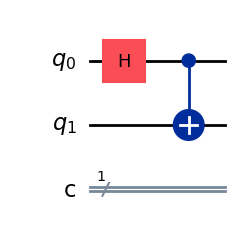

Final state = Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


Two qubit state =

<IPython.core.display.Latex object>

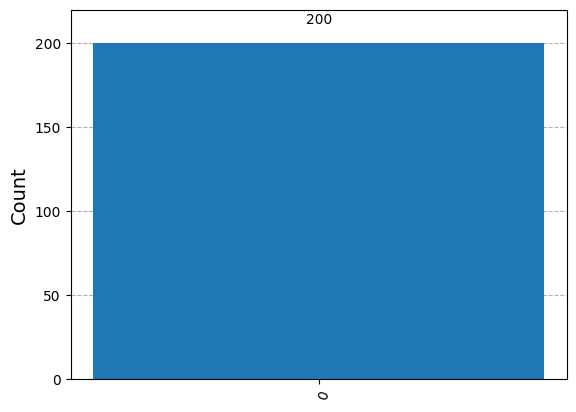

In [45]:
## ----- CODE FOR GENERATION OF BELL STATE |Phi+> -------

# Create a quantum circuit for 2 qubits
qc = QuantumCircuit(2,1)

# Apply H-gate to the first qubit:
qc.h(0)

# Apply a CNOT:
qc.cx(0,1)

# Show circuit
display(qc.draw('mpl'))

simulator = AerSimulator() # need to import AerSimulator 

# Save the statevector into the quantum circuit
qc.save_statevector()


# Transpile the circuit for the simulator
qc = transpile(qc, simulator)

# Run on the simulator/backend
job = simulator.run(qc, shots=200).result() # some define variable `result` as well 

# Get final statevector from job
final_state_1 = job.get_statevector()
print('Final state =',final_state_1)
display( Markdown(r'Two qubit state ='), final_state_1.draw('latex') )
array_to_latex(final_state_1, prefix="(\\text{Two qubit state})^T = ")

# Get counts and plot histogram 
plot_histogram(job.get_counts())

|Q > = |1 >


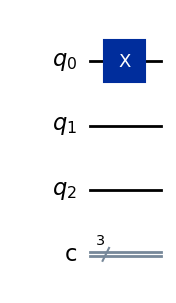

Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


Initial three qubit state =

<IPython.core.display.Latex object>

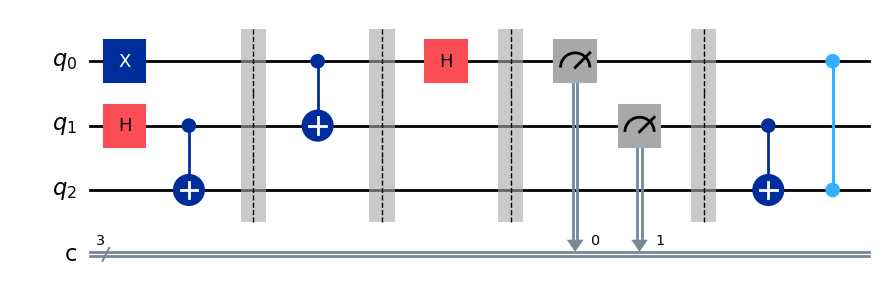

Final state = Statevector([0.+0.0000000e+00j, 0.+0.0000000e+00j, 0.+0.0000000e+00j,
             0.+0.0000000e+00j, 1.-1.2246468e-16j, 0.-0.0000000e+00j,
             0.+0.0000000e+00j, 0.-0.0000000e+00j],
            dims=(2, 2, 2))


Three qubit state =

<IPython.core.display.Latex object>

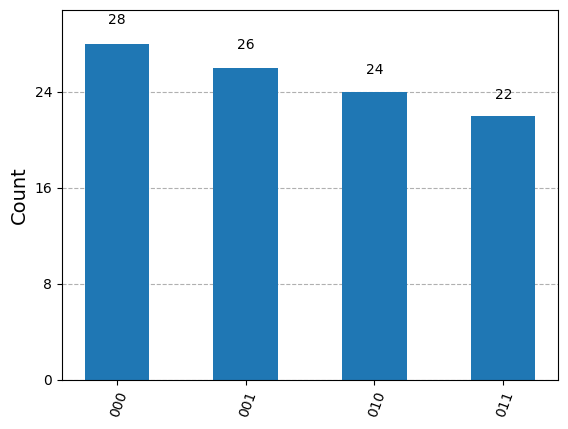

In [42]:
## --- QUANTUM TELEPORTATION CODE ----------

# Create a quantum circuit for 3 qubits and their measurements

qc = QuantumCircuit(3, 3)


# Prepare mysterious state |Q>  
choice = 0 # default choice |Q> = |0>
choice = 1  # |Q> = |1>
choice = 2 # |Q> = (|0> + |1>)/sqrt(2)
choice = 3; a = 0.8; b = np.sqrt(1-a*a)
           # |Q> = a|0> + b|1> [generic superposition]

choice = 1
if choice == 0:
  print('|Q > = |0 >')
elif choice == 1:
  qc.x(0) 
  print('|Q > = |1 >') 
elif choice == 2:
  qc.h(0) 
  print(f'|Q > = .70710678|0 > + .70710678|1 >')
else:
  theta = 2*np.arccos(a); phi = 0
  qc.u(theta, phi, 0, 0) 
  print(f'|Q > = {a}|0 > + {b}|1 >')
display(qc.draw('mpl'))


# Check initial state |\psi>
psi = Statevector(qc)
print(psi)
display(Markdown(r'Initial three qubit state ='),psi.draw('latex'))
array_to_latex(psi, prefix="(\\text{Three qubit state})^T = ")

###  Step 1: create an entangled Bell pair between Alice and Bob (q1 & q2)
qc.h(1)
qc.cx(1,2)
qc.barrier() # put a barrier to demarcate


### Step 2: Alice applies a series of operations between the state to teleport (q0) 
###.       and her half of the Bell pair (q1)
qc.cx(0,1)
qc.barrier()
qc.h(0)
qc.barrier() # put a barrier to visualize 


### Step 3: Alice measures on q0 and q1, sends the results to Bob as classical bits
#qc.measure([0, 1], [0, 1]) # results stored in classical bits 0 and 1, respectively
qc.measure(0,0)
qc.measure(1,1)
qc.barrier()
qc.draw('mpl')

### Step 4: Based on Alice's results, Bob performs gates 
qc.cx(1,2)
qc.cz(0,2)
qc.draw('mpl')

### Step 5: Bob measures (does he need to?)
# qc.measure(2,2)

display(qc.draw(output='mpl'))


### Now check the state through quantum silmulator
simulator = AerSimulator() # need to import AerSimulator 

# Save the statevector into the quantum circuit
qc.save_statevector() # 


# Transpile the circuit for the simulator
qc = transpile(qc, simulator)

# Run job on the simulator/backend 
job = simulator.run(qc, shots=100).result() 

# Get final statevector from job
final_state_2 = job.get_statevector()
print('Final state =',final_state_2)
display( Markdown(r'Three qubit state ='), final_state_2.draw('latex') )
array_to_latex(final_state_2, prefix="(\\text{Three qubit state})^T = ")



# Get counts and plot histogram
plot_histogram(job.get_counts())